## Analyse FF Left Ventricle Tissue with scGCO

In [1]:
#import scanpy as sc
from math import gcd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sns
#import scanorama
import csv
import dill
from sklearn.metrics.pairwise import cosine_distances
from scGCO import *
import scanpy as sc

%matploblib inline

/Users/nataliecharitakis/opt/anaconda3/envs/scgco/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
UsageError: Line magic function `%matploblib` not found.


In [2]:
#read dataframe of preprocessed counts back into scGCO 
norm_counts = pd.read_csv('X.csv',header=None)
norm_counts.head()

,0,1,2,3,4,5,6,7,8,9,...,15117,15118,15119,15120,15121,15122,15123,15124,15125,15126
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.972366,0.641037,5.820141,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.806478,0.000000,5.763999,0.0,0.0,0.0,0.0,0.0,0.631184,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.541417,0.0,0.541417,0.0,...,3.506452,0.541417,5.712891,0.0,0.0,0.0,0.0,0.0,0.541417,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,4.018537,1.144843,6.096687,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,1.026573,0.0,0.0,0.0,0.000000,0.0,0.639610,0.0,...,4.111115,0.000000,5.869077,0.0,0.0,0.0,0.0,0.0,1.026573,0.0


In [3]:
##need to add in gene names and cell types
obs_norm_counts = pd.read_csv('obs.csv')
norm_counts_barcodes = obs_norm_counts["Unnamed: 0"]

#add this column as index to norm_counts
norm_counts.index = norm_counts_barcodes
norm_counts

,0,1,2,3,4,5,6,7,8,9,...,15117,15118,15119,15120,15121,15122,15123,15124,15125,15126
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.972366,0.641037,5.820141,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.806478,0.000000,5.763999,0.0,0.00000,0.0,0.0,0.0,0.631184,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.541417,0.0,0.541417,0.0,...,3.506452,0.541417,5.712891,0.0,0.00000,0.0,0.0,0.0,0.541417,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,4.018537,1.144843,6.096687,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
AAACATGGTGAGAGGA-1,0.0,0.0,1.026573,0.0,0.0,0.0,0.000000,0.0,0.639610,0.0,...,4.111115,0.000000,5.869077,0.0,0.00000,0.0,0.0,0.0,1.026573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.690634,0.0,0.000000,0.0,...,3.521476,0.000000,5.702094,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
TTGTTTCACATCCAGG-1,0.0,0.0,0.498006,0.0,0.0,0.0,0.498006,0.0,0.000000,0.0,...,3.523924,0.000000,5.668190,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.969055,0.000000,6.117398,0.0,0.57388,0.0,0.0,0.0,0.000000,0.0


In [4]:
##get gene names
var_norm_counts = pd.read_csv('var.csv')
var_genes = list(var_norm_counts["Unnamed: 0"])

#add these as column names
norm_counts.columns = var_genes
norm_counts

,AL627309.5,LINC01409,LINC01128,LINC00115,NOC2L,KLHL17,PERM1,AL645608.7,HES4,ISG15,...,MT-ND5,MT-ND6,MT-CYB,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC240274.1,AC007325.4,AC007325.2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.972366,0.641037,5.820141,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.806478,0.000000,5.763999,0.0,0.00000,0.0,0.0,0.0,0.631184,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.541417,0.0,0.541417,0.0,...,3.506452,0.541417,5.712891,0.0,0.00000,0.0,0.0,0.0,0.541417,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,4.018537,1.144843,6.096687,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
AAACATGGTGAGAGGA-1,0.0,0.0,1.026573,0.0,0.0,0.0,0.000000,0.0,0.639610,0.0,...,4.111115,0.000000,5.869077,0.0,0.00000,0.0,0.0,0.0,1.026573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.690634,0.0,0.000000,0.0,...,3.521476,0.000000,5.702094,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
TTGTTTCACATCCAGG-1,0.0,0.0,0.498006,0.0,0.0,0.0,0.498006,0.0,0.000000,0.0,...,3.523924,0.000000,5.668190,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,3.969055,0.000000,6.117398,0.0,0.57388,0.0,0.0,0.0,0.000000,0.0


In [5]:
ff_left_ventricle = sc.read('ff_left_ventricle.h5ad')

array_row = list(ff_left_ventricle.obs["array_row"])
array_col = list(ff_left_ventricle.obs["array_col"])
locs = np.column_stack((array_col,array_row))
locs

array([[102,  50],
       [ 19,  59],
       [ 94,  14],
       ...,
       [ 30,  60],
       [ 27,  45],
       [ 51,   7]])

In [6]:
#begin scGCO processing for determing presence of SVGs
#create graph connecting space and spots
exp= norm_counts.iloc[:,0]
cellGraph= create_graph_with_weight(locs, exp)

Text(0.5, 1.0, 'CellGraph')

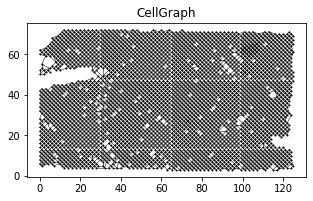

In [7]:
#Look at graph
fig, ax= plt.subplots(1,1,figsize=(5,5)) #, dpi=300)
ax.set_aspect('equal')

exp= norm_counts.iloc[:,0].values
cellGraph = create_graph_with_weight(locs, exp)
ax.scatter(locs[:,0], locs[:,1], s=1, color='black')
for i in np.arange(cellGraph.shape[0]):
    x = (locs[int(cellGraph[i,0]), 0], locs[int(cellGraph[i,1]), 0]) 
    y = (locs[int(cellGraph[i,0]), 1], locs[int(cellGraph[i,1]), 1])     
    ax.plot(x, y, color='black', linewidth=0.5)
    
plt.title('CellGraph')

In [ ]:
#Skip to step 2: Gene expression processing with Gaussian mixture modelling
output_dir = 'scGCO_outputs/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir) 
    
import time
t0 = time.time()
gmmDict=multiGMM(norm_counts)
t1= time.time()
print(t1-t0, ' second')

# # save gmm results
fileName=os.path.join(output_dir,"ff_left_ventricle_scanpy_scgco_gmmDict.pkl")




store_gmm(gmmDict,fileName)

  0%|                                                   | 0/8 [00:00<?, ?it/s]Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
  0%|                                                   | 0/8 [00:56<?, ?it/s]KeyboardInterrupt
Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt
Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
KeyboardInterrupt
Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (mos

In [ ]:
#Run main function to identify SVGs
t0= time.time()
result_df= identify_spatial_genes(locs, norm_counts, 
                                    cellGraph ,gmmDict)
print('Running time: {} seconds'.format(time.time()-t0))

In [ ]:
#Select genes with an fdr cut-off of 0.05
fdr_cutoff=0.05
fdr_df=result_df.sort_values('fdr').loc[result_df.fdr<fdr_cutoff,]

print(fdr_df.shape)

In [ ]:
#save these genes to a file
fdr_df.to_csv('scGCO_outputs/ff_left_ventricle_scGCO_sig_svgs.csv')